In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df.shape

(730, 16)

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
def ass_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    elif x==4:
        return 'winter'

df['season'] = df['season'].apply(ass_season)

In [12]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
def ass_mnth(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df[['mnth']] = df[['mnth']].apply(ass_mnth)

In [14]:
df['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [15]:
df[['yr']] = df[['yr']].apply(lambda x: x.map({0:'2018',1:'2019'}))
df[['holiday']] = df[['holiday']].apply(lambda x: x.map({0:'No',1:'Yes'}))
df[['weekday']] = df[['weekday']].apply(lambda x: x.map({0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6'}))
#instead of day_name, the day_number has been used to convert it into string to avoid the confusion which day shall be first day of week, whether Sunday or Monday.

df[['workingday']] = df[['workingday']].apply(lambda x: x.map({0:'No',1:'Yes'}))
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1:'1',2:'2',3:'3',4:'4'}))


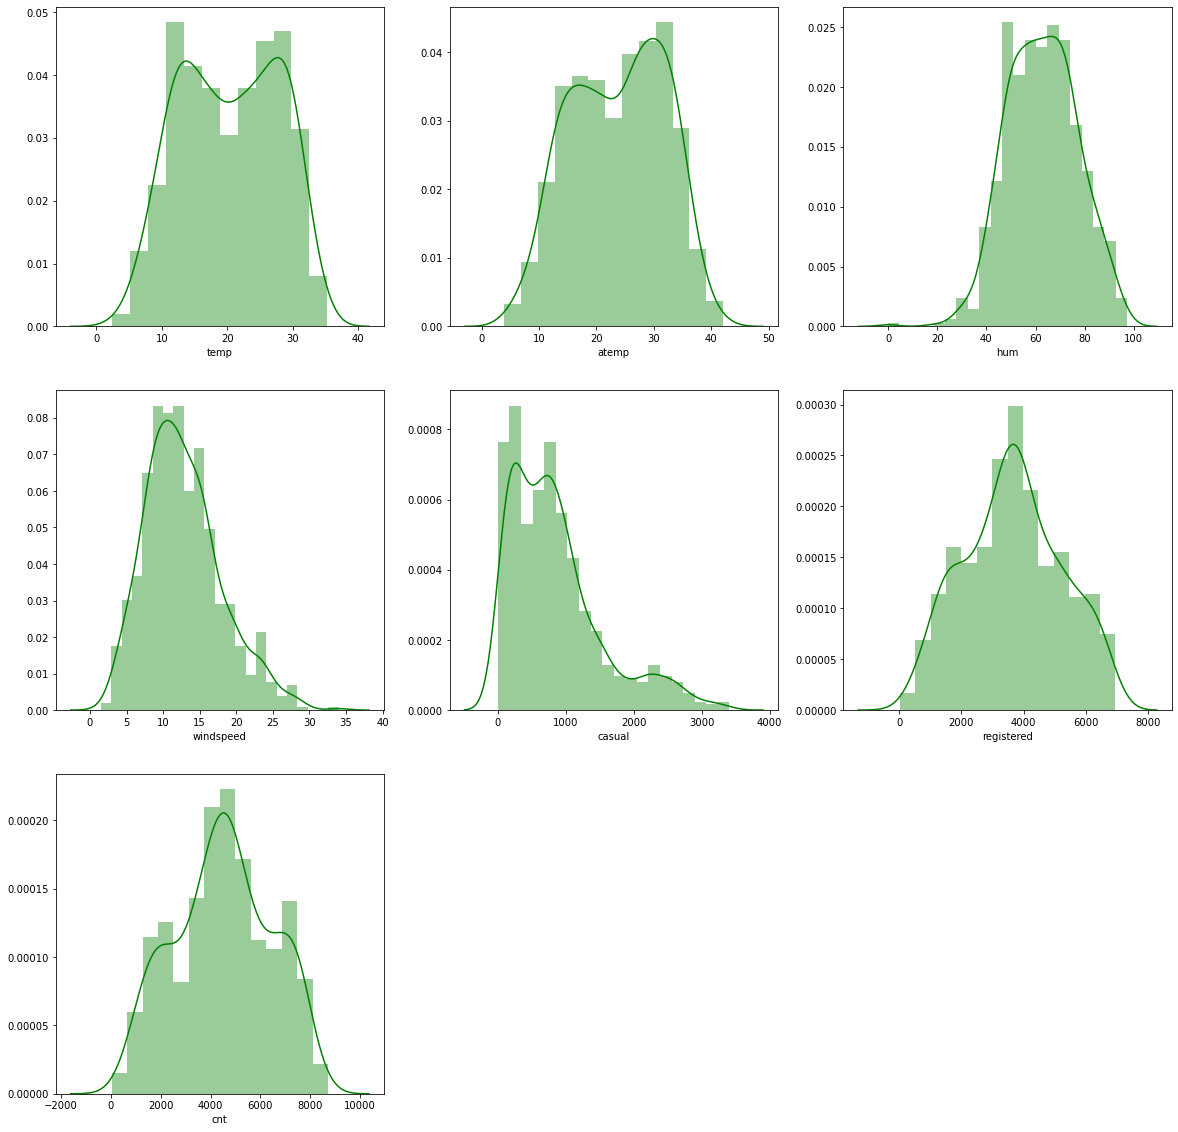

In [16]:
# Data Visualization for numerical variables
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.distplot(df['temp'], color = 'g');
plt.subplot(332)
sns.distplot(df['atemp'], color = 'g');
plt.subplot(333)
sns.distplot(df['hum'], color = 'g');
plt.subplot(334)
sns.distplot(df['windspeed'], color = 'g');
plt.subplot(335)
sns.distplot(df['casual'], color = 'g');
plt.subplot(336)
sns.distplot(df['registered'], color = 'g');
plt.subplot(337)
sns.distplot(df['cnt'], color = 'g');


In [17]:
df['dteday'] = df['dteday'].astype('datetime64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
df_categorical = df.select_dtypes(exclude=['float64','int64','datetime64'])
df_categorical

season    yr mnth holiday weekday workingday weathersit
0    spring  2018  Jan      No       1        Yes          2
1    spring  2018  Jan      No       2        Yes          2
2    spring  2018  Jan      No       3        Yes          1
3    spring  2018  Jan      No       4        Yes          1
4    spring  2018  Jan      No       5        Yes          1
..      ...   ...  ...     ...     ...        ...        ...
725  spring  2019  Dec      No       5        Yes          2
726  spring  2019  Dec      No       6         No          2
727  spring  2019  Dec      No       0         No          2
728  spring  2019  Dec      No       1        Yes          1
729  spring  2019  Dec      No       2        Yes          2

[730 rows x 7 columns]

In [20]:
len(df_categorical.columns)

7

In [21]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

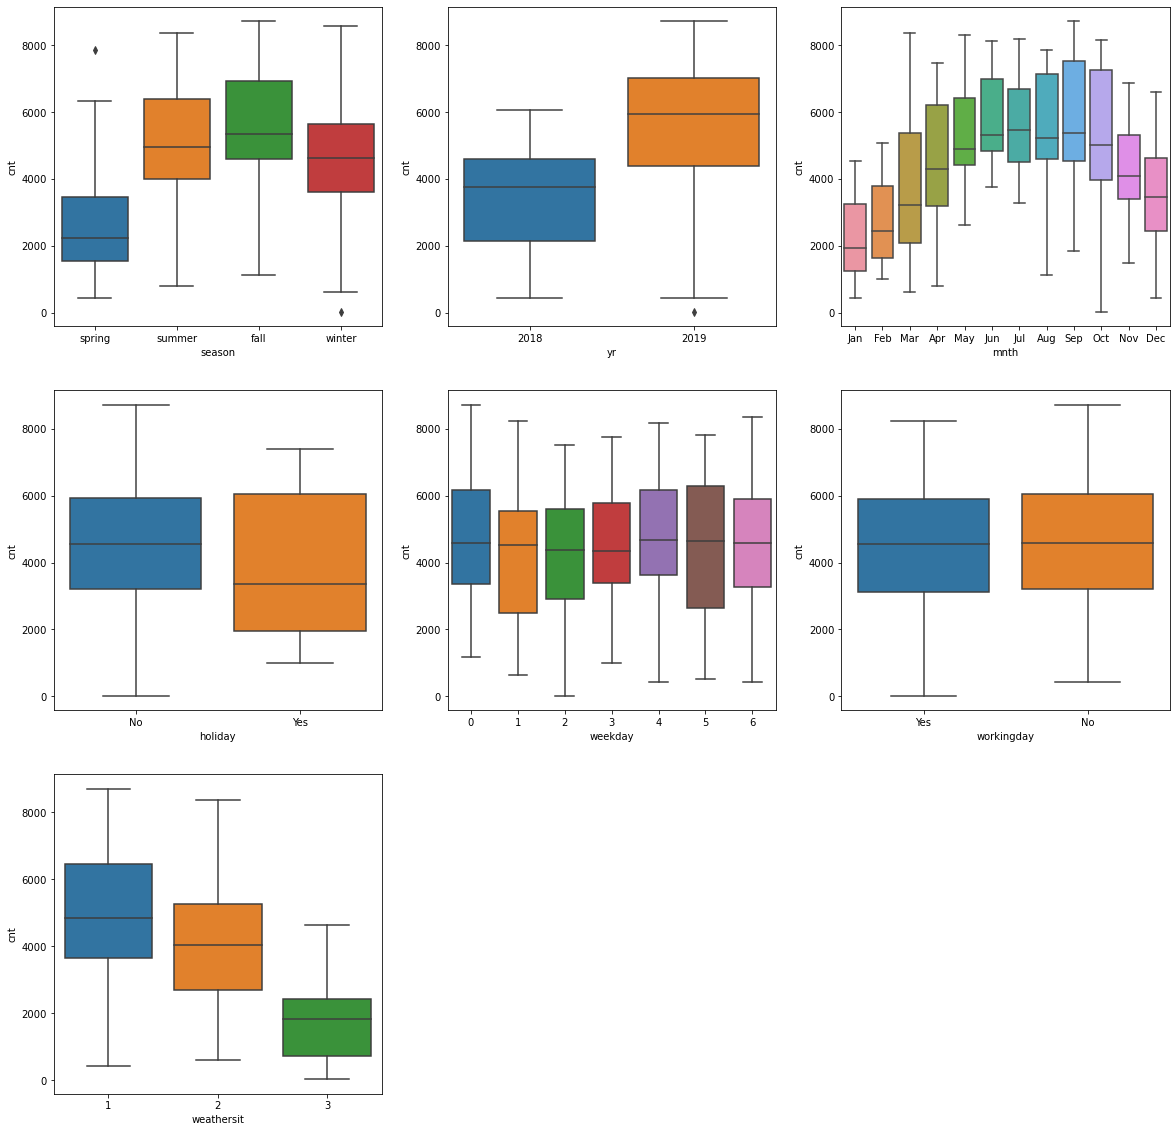

In [22]:
# Data Visualization for Categorical cols

plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(332)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(333)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(334)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(335)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(336)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(337)
sns.boxplot(x='weathersit',y='cnt',data=df)


In [23]:
df.describe().columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [24]:
IV = [ 'instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for var in IV:
    df[var] = df[var].astype("float")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    float64       
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [26]:
# Select all Numerical features

df_numeric = df.select_dtypes(include=["float64"])

In [27]:
#dropping index column as it has no impact over target and it's just data row counter
df_numeric.drop(['instant'], axis =1, inplace = True)

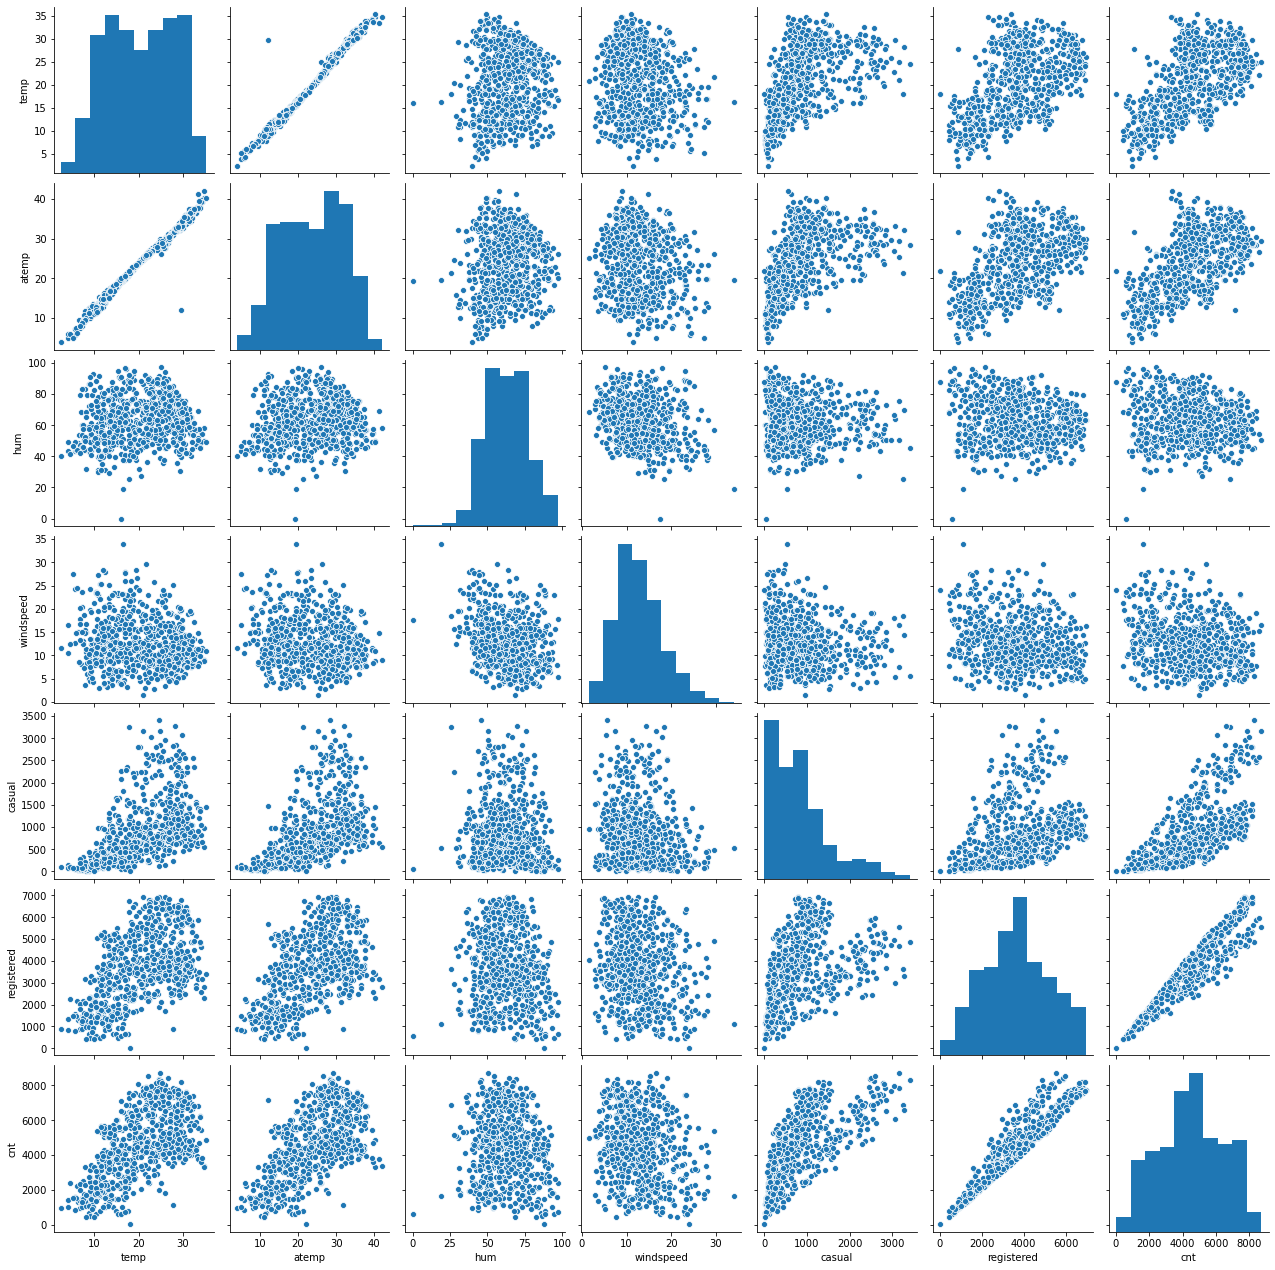

In [28]:
# Pairplot
# sns.pairplot(df_numeric)
sns.pairplot(df_numeric)
plt.show();

In [29]:
# Corelation MAtrix

cor = df_numeric.corr()
cor

temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000

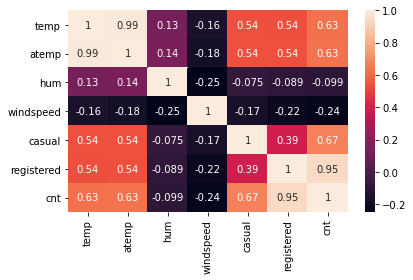

In [30]:
plt.figure()
sns.heatmap(cor,annot=True);
plt.tight_layout()

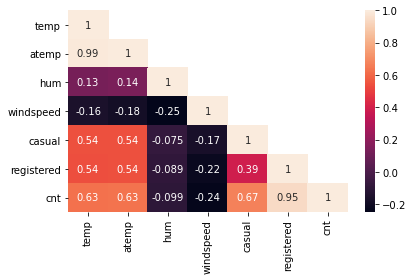

In [31]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)]=False
plt.figure()
sns.heatmap(cor,mask=mask,annot=True);
plt.tight_layout()

In [32]:
# drop casual, reg, atemp

df.drop(['casual','registered','atemp'],axis=1,inplace=True)

### Data preparation

In [33]:
# Lets procedd to do OHE of the categorical cols

df_categorical = df.select_dtypes(include=['object'])
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [34]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

season_spring  season_summer  season_winter  yr_2019  mnth_Aug  mnth_Dec  \
0              1              0              0        0         0         0   
1              1              0              0        0         0         0   
2              1              0              0        0         0         0   
3              1              0              0        0         0         0   
4              1              0              0        0         0         0   

   mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  ...  holiday_Yes  weekday_1  \
0         0         1         0         0  ...            0          1   
1         0         1         0         0  ...            0          0   
2         0         1         0         0  ...            0          0   
3         0         1         0         0  ...            0          0   
4         0         1         0         0  ...            0          0   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  workingday_Yes  \
0          0          0          0          0          0               1   
1          1          0          0          0          0               1   
2          0          1          0          0          0               1   
3          0          0          1          0          0               1   
4          0          0          0          1          0               1   

   weathersit_2  weathersit_3  
0             1             0  
1             1             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 25 columns]

In [35]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [36]:
df.drop(df_categorical.columns,axis=1,inplace=True)

In [37]:
df.columns

Index(['instant', 'dteday', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [38]:
# instant is useless
# instant and dteday are useless in ur dataset. Drop them

df.drop(['instant','dteday'],axis=1,inplace=True)

In [39]:
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [40]:
df.head()

temp      hum  windspeed     cnt
0  14.110847  80.5833  10.749882   985.0
1  14.902598  69.6087  16.652113   801.0
2   8.050924  43.7273  16.636703  1349.0
3   8.200000  59.0435  10.739832  1562.0
4   9.305237  43.6957  12.522300  1600.0

In [41]:
df = pd.concat([df, df_dummies],axis=1)

In [42]:
df.head()

temp      hum  windspeed     cnt  season_spring  season_summer  \
0  14.110847  80.5833  10.749882   985.0              1              0   
1  14.902598  69.6087  16.652113   801.0              1              0   
2   8.050924  43.7273  16.636703  1349.0              1              0   
3   8.200000  59.0435  10.739832  1562.0              1              0   
4   9.305237  43.6957  12.522300  1600.0              1              0   

   season_winter  yr_2019  mnth_Aug  mnth_Dec  ...  holiday_Yes  weekday_1  \
0              0        0         0         0  ...            0          1   
1              0        0         0         0  ...            0          0   
2              0        0         0         0  ...            0          0   
3              0        0         0         0  ...            0          0   
4              0        0         0         0  ...            0          0   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  workingday_Yes  \
0          0          0          0          0          0               1   
1          1          0          0          0          0               1   
2          0          1          0          0          0               1   
3          0          0          1          0          0               1   
4          0          0          0          1          0               1   

   weathersit_2  weathersit_3  
0             1             0  
1             1             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 29 columns]

In [43]:
X = df.drop('cnt',axis=1)
y=df['cnt']

In [44]:
X.shape

(730, 28)

In [45]:
y.shape

(730,)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [47]:
X_train.head()

temp      hum  windspeed  season_spring  season_summer  \
704  10.489153  50.8750  11.708518              0              0   
565  27.299153  84.4167  14.000789              0              0   
185  30.613347  59.0417   8.459286              0              0   
269  26.103347  88.5417   7.917457              0              0   
178  30.510847  63.4167   9.666961              0              0   

     season_winter  yr_2019  mnth_Aug  mnth_Dec  mnth_Feb  ...  holiday_Yes  \
704              1        1         0         1         0  ...            0   
565              0        1         0         0         0  ...            0   
185              0        0         0         0         0  ...            0   
269              1        0         0         0         0  ...            0   
178              0        0         0         0         0  ...            0   

     weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
704          0          0          0          0          1          0   
565          0          0          0          0          0          1   
185          0          0          0          1          0          0   
269          0          0          0          1          0          0   
178          0          0          0          1          0          0   

     workingday_Yes  weathersit_2  weathersit_3  
704               1             0             0  
565               0             1             0  
185               1             0             0  
269               1             1             0  
178               1             0             0  

[5 rows x 28 columns]

In [48]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_Yes',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [49]:
X_train.describe().columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_Yes',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [50]:
# Scaling of the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
var = ['temp', 'hum', 'windspeed']
X_train[var] = scaler.fit_transform(X_train[var])

In [52]:
X_train.head()

temp       hum  windspeed  season_spring  season_summer  \
704  0.245101  0.523136   0.314103              0              0   
565  0.755981  0.868038   0.384635              0              0   
185  0.856704  0.607113   0.214126              0              0   
269  0.719639  0.910454   0.197454              0              0   
178  0.853589  0.652100   0.251285              0              0   

     season_winter  yr_2019  mnth_Aug  mnth_Dec  mnth_Feb  ...  holiday_Yes  \
704              1        1         0         1         0  ...            0   
565              0        1         0         0         0  ...            0   
185              0        0         0         0         0  ...            0   
269              1        0         0         0         0  ...            0   
178              0        0         0         0         0  ...            0   

     weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
704          0          0          0          0          1          0   
565          0          0          0          0          0          1   
185          0          0          0          1          0          0   
269          0          0          0          1          0          0   
178          0          0          0          1          0          0   

     workingday_Yes  weathersit_2  weathersit_3  
704               1             0             0  
565               0             1             0  
185               1             0             0  
269               1             1             0  
178               1             0             0  

[5 rows x 28 columns]

In [53]:
# Training and Making Predictions

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [54]:
regressor.coef_

array([ 3667.70817799, -1381.38331668, -1319.28853888,  -912.49487819,
         116.27963512,   803.75322665,  2020.23327656,    46.7135944 ,
        -452.43870819,   -85.2005177 ,  -257.45004343,  -173.12188842,
         143.95424349,   321.85594231,   304.93569778,  -532.71386714,
         173.76046079,   668.81597659,  -162.10537526,  -691.28628922,
        -758.04526685,  -521.0402762 ,  -497.26231413,  -430.57619378,
        -113.35610988,   411.91067009,  -418.43159434, -1826.12106732])

In [55]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficients'])
coeff_df

Coefficients
temp             3667.708178
hum             -1381.383317
windspeed       -1319.288539
season_spring    -912.494878
season_summer     116.279635
season_winter     803.753227
yr_2019          2020.233277
mnth_Aug           46.713594
mnth_Dec         -452.438708
mnth_Feb          -85.200518
mnth_Jan         -257.450043
mnth_Jul         -173.121888
mnth_Jun          143.954243
mnth_Mar          321.855942
mnth_May          304.935698
mnth_Nov         -532.713867
mnth_Oct          173.760461
mnth_Sep          668.815977
holiday_Yes      -162.105375
weekday_1        -691.286289
weekday_2        -758.045267
weekday_3        -521.040276
weekday_4        -497.262314
weekday_5        -430.576194
weekday_6        -113.356110
workingday_Yes    411.910670
weathersit_2     -418.431594
weathersit_3    -1826.121067

In [56]:
regressor.intercept_

3192.8116114087697

In [57]:
X_test.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_Yes',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [58]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_Yes',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [59]:
X_test[var] = scaler.transform(X_test[var])

In [60]:
# Making Predictions

y_pred = regressor.predict(X_test)

In [61]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

Actual    Predicted
591  7347.0  6852.819028
455  6041.0  4939.196590
226  4338.0  4384.230050
131  4864.0  4158.728106
232  3873.0  4162.366261
..      ...          ...
300  3747.0  3598.237481
676  5315.0  5445.847891
447  3372.0  5537.898014
124  4433.0  3955.479331
261  4539.0  4241.692275

[146 rows x 2 columns]

In [62]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 605.1726176740112
Mean Squared Error: 704390.8695932082
Root Mean Squared Error: 839.2799709234149


In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.7782224136888091

In [64]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8579986810192555 0.8508346505121188


In [65]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7782224136888093 0.7251474357681824


In [66]:
# RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train,y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 4),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', False, 6),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 7),
 ('workingday_Yes', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [69]:
X_train.columns[rfe.support_]

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'workingday_Yes', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [70]:
# Build a model using statsmodel

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

temp       hum  windspeed  season_spring  season_winter  yr_2019  \
704  0.245101  0.523136   0.314103              0              1        1   
565  0.755981  0.868038   0.384635              0              0        1   
185  0.856704  0.607113   0.214126              0              0        0   
269  0.719639  0.910454   0.197454              0              1        0   
178  0.853589  0.652100   0.251285              0              0        0   

     mnth_Dec  mnth_Jul  mnth_Mar  mnth_May  mnth_Nov  mnth_Sep  weekday_1  \
704         1         0         0         0         0         0          0   
565         0         1         0         0         0         0          0   
185         0         1         0         0         0         0          0   
269         0         0         0         0         0         1          0   
178         0         0         0         0         0         0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  workingday_Yes  weathersit_2  \
704          0          0          0          1               1             0   
565          0          0          0          0               0             1   
185          0          0          1          0               1             0   
269          0          0          1          0               1             1   
178          0          0          1          0               1             0   

     weathersit_3  
704             0  
565             0  
185             0  
269             0  
178             0

In [71]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [72]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     168.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.32e-222
Time:                        22:26:20   Log-Likelihood:                -4691.9
No. Observations:                 584   AIC:                             9426.
Df Residuals:                     563   BIC:                             9518.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3163.5805    264.080     11.

In [73]:
# all p-val <0.05 are selected

In [74]:
# Multicolinearity -> VIF
checkVIF(X_train_new)

Features    VIF
0            const  70.48
18  workingday_Yes   8.12
17       weekday_5   6.20
16       weekday_4   5.97
13       weekday_1   5.84
14       weekday_2   5.55
15       weekday_3   4.92
1             temp   3.30
4    season_spring   2.96
5    season_winter   2.42
2              hum   2.06
11        mnth_Nov   1.63
19    weathersit_2   1.58
7         mnth_Dec   1.39
8         mnth_Jul   1.37
20    weathersit_3   1.36
10        mnth_May   1.27
3        windspeed   1.22
12        mnth_Sep   1.19
9         mnth_Mar   1.13
6          yr_2019   1.05

In [75]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

In [76]:
y_train_pred

704    5367.220501
565    5609.927759
185    4944.798010
269    5294.633053
178    5144.051210
          ...     
98     2308.317614
322    3158.125424
382    3563.544223
365    3801.493847
510    6971.600554
Length: 584, dtype: float64

Text(0.5, 0, 'Errors')

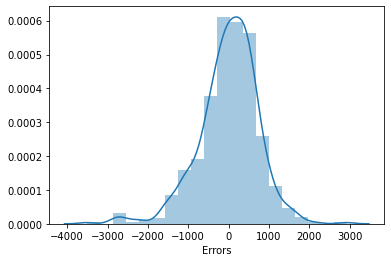

In [77]:
#Errors are normally distributed
fig = plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
plt.xlabel("Errors")


Text(0, 0.5, 'Residual')

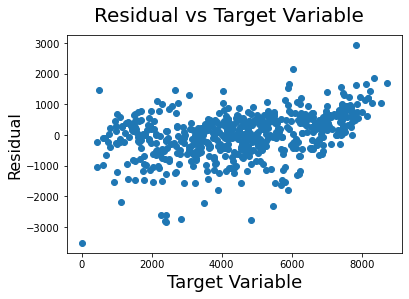

In [78]:
# Plotting residuals to check if any pattern exist in error terms

fig = plt.figure()
plt.scatter(y_train, y_train-y_train_pred)
fig.suptitle('Residual vs Target Variable', fontsize = 20)              # Plot heading 
plt.xlabel('Target Variable', fontsize = 18)                          # X-label
plt.ylabel('Residual', fontsize = 16)      

# Prediction


In [79]:
X_test = X_test[X_train.columns[rfe.support_]]

In [80]:
X_test = sm.add_constant(X_test) #Adding the constant

In [81]:
y_test_pred = lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

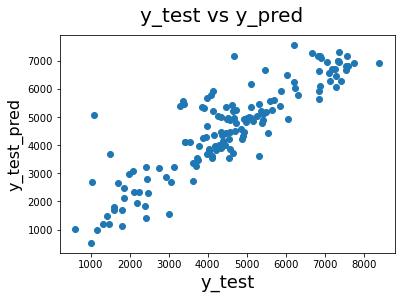

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7756501006184937